#### Explore AI Academy: Final Python Project



<div style="font-size: 35px">
    <font color='Blue'> <b>Avocado Prices Data Analysis</b></font> 

<img src="Avocados.jpg" width="400" height="300">

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Feature Engineering](#chapter6)</b>
* <b>[7. Conclusion](#chapter7)</b>
* [8. References](#chapter8)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### Introduction <a class="anchor" id="section_1_1"></a>




> <b> Objective of the Project:</b> This Notebook provides a detailed overview of the avocado sales data analysis project. The analysis offers  strategic insight into avocado sales trends in the US (2015 – 2020) to aid business decision making and inform forecasting

> <b> Data Source:</b> The analysis utilized three datasets from the avocado package: hass_usa: Weekly country-level Hass Avocado sales data | hass_region: Weekly regional-level Hass Avocado sales data | hass: Weekly city/sub-region-level Hass Avocado sales data.

> <b> Data Structure and Features:</b> Week Ending: The date of the last day of the week | Average Price: The average selling price for non-organic and organic avocados | PLU Codes: The product lookup codes for different sizes and types of avocados (e.g., small, medium, large, organic, non-organic) | Sales Volumes: The amount of avocados sold by weight in pounds, both individually (bulk) and in pre-packaged bags.

> <b> Data Cleaning and Preprocessing:</b> Missing Values: Handled missing values by setting them to zero | Column Renaming: Renamed columns for consistency and clarity | Date Conversion: Converted the 'Date' column to datetime format for easier analysis | Feature Creation: Created new columns like 'Year', 'Month', and 'Year_Month' for time-based analysis.

> <b> Exploratory Data Analysis:</b> Summary Statistics: Calculated summary statistics (mean, median, standard deviation, etc.) for key variables | Data Distribution: Visualized the distribution of variables using histograms and box plots | Correlation Analysis: Identified relationships between variables using correlation analysis | Time Series Analysis: Analyzed trends and patterns over time using line plots and seasonal decomposition.

> <b> Expected Outcomes:</b> Sales Trends: Sales Trends: Observed cyclical patterns in avocado sales, with peaks in certain months and regions | Price Analysis: Compared prices of organic and conventional avocados, finding a significant price difference | Sales Volume: Analyzed sales volumes by region, size, and type of avocado | Seasonal Patterns: Identified seasonal variations in sales volumes and prices

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

This data set was created to list the national retail sales volumes of organic and conventional avocados in the USA from 2015-2023, and analyze the data to find interesting facts and insights around the sales distribution of avocados depending on the avocado type, the sales location, and the sales period.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [1]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')


## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the `AvoData.csv` file. To better manipulate and analyse the `AvoData.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [2]:
#Loading Avocado Dataset
df = pd.read_csv(r"C:\Users\f4701399\Downloads\AvoData.csv", index_col=False)
df.head() 

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


To set the maximum number of columns to be displayed, the `pd.set_option()` function was put in place.

In [3]:
# displays unlimited number of columns
pd.set_option("display.max_columns", None)

<div class="alert alert-block alert-danger">
<b>To prevent any major changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [4]:
# The copy of the dataframe
df_copy = df.copy()

First look at the shape of the dataframe by using `.shape`.

In [5]:
# Displays the number of rows and columns
df_copy.shape

(53415, 12)

**Results** : The dataset consists of 53 415 rows (observations) and 12 columns (features). 

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [6]:
## Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


**Results:** Of the 53 415 rows in the data set, 12 390 rows have null values in the 'SmallBags', 'LargeBags' and 'XLargeBags' columns. This is roughly 25% of rows that have null values in those 3 specific columns, contributing to a significant portion of data.

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

<div class="alert alert-block alert-info">
<b>Data cleaning</b> is a vital step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div>


The `check_null_values` function iterates over each column in a DataFrame to identify and print the count of null values, providing column-specific null counts.

In [7]:
def check_null_values(df_copy):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    for column in df_copy:
        if df_copy[column].isnull().any():
            print('{0} has {1} null values'.format(column, df_copy[column].isnull().sum()))

In [8]:
check_null_values(df_copy)

SmallBags has 12390 null values
LargeBags has 12390 null values
XLargeBags has 12390 null values


The `count_duplicate_rows` function checks a DataFrame for duplicate entries by utilizing the duplicated method, which identifies duplicates, and then summarizes the total number of duplicate rows. This function is useful for data cleaning processes, ensuring uniqueness in datasets by returning the count of duplicate rows.

In [9]:
def count_duplicate_rows(df_copy):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df_copy (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df_copy.duplicated().sum()
    return duplicate_count


In [10]:
count_duplicate_rows(df_copy)

np.int64(0)

There are zero duplicate rows in the dataset.

---

The `assign_area` function performs essential data manipulation operations by inserting a new column that classifies the given region into a broader area for further insight gathering. After processing, it prints the first two rows of the cleaned DataFrame for quick inspection and returns the entire modified DataFrame for further use.

The following National Geographic map was used to classify the regions into their broader areas:
https://education.nationalgeographic.org/resource/united-states-regions/

In [11]:
def assign_area(df_copy):
    """
    Assign a new 'area' column to the DataFrame based on the record's region.

    This includes:
    - Setting missing 'seasons' to 0.

    Returns:
        DataFrame: The cleaned DataFrame.
    """
    
    # Assign the provided sales region to a broader area of the United States
    region_area = {
        'Albany' : 'Northeast',
        'Atlanta' : 'Southeast',
        'BaltimoreWashington' : 'Northeast',
        'BirminghamMontgomery' : 'Southeast',
        'Boise' : 'West',
        'Boston' : 'Northeast',
        'BuffaloRochester' : 'Northeast',
        'California' : 'West',
        'Charlotte' : 'Southeast',
        'Chicago' : 'Midwest',
        'CincinnatiDayton' : 'Midwest',
        'Columbus' : 'Midwest',
        'DallasFtWorth' : 'SouthCentral',
        'Denver' : 'West',
        'Detroit' : 'Midwest',
        'GrandRapids' : 'Midwest',
        'GreatLakes' : 'Midwest',
        'HarrisburgScranton' : 'Northeast',
        'HartfordSpringfield' : 'Northeast',
        'Houston' : 'SouthCentral',
        'Indianapolis' : 'Midwest',
        'Jacksonville' : 'Southeast',
        'LasVegas' : 'West',
        'LosAngeles' : 'West',
        'Louisville' : 'Southeast',
        'Miami' : 'Southeast',
        'MiamiFtLauderdale' : 'Southeast',
        'Midsouth' : 'SouthCentral',
        'Nashville' : 'Southeast',
        'NewOrleans' : 'SouthCentral',
        'NewYork' : 'Northeast',
        'Northeast' : 'Northeast',
        'NorthernNewEngland' : 'Northeast',
        'Orlando' : 'Southeast',
        'PeoriaSpringfield' : 'Midwest',
        'Philadelphia' : 'Northeast',
        'PhoenixTucson' : 'West',
        'Pittsburgh' : 'Northeast',
        'Plains' : 'Midwest',
        'Portland' : 'West',
        'Providence' : 'Northeast',
        'RaleighGreensboro' : 'Southeast',
        'RichmondNorfolk' : 'Southeast',
        'Roanoke' : 'Southeast',
        'Sacramento' : 'West',
        'SanDiego' : 'West',
        'SanFrancisco' : 'West',
        'Seattle' : 'West',
        'SouthCarolina' : 'Southeast',
        'SouthCentral' : 'SouthCentral',
        'Southeast' : 'Southeast',
        'Spokane' : 'West',
        'StLouis' : 'Midwest',
        'Syracuse' : 'Northeast',
        'Tampa' : 'Southeast',
        'Toledo' : 'Midwest',
        'West' : 'West',
        'WestTexNewMexico' : 'West',
        'Wichita' : 'SouthCentral'
    }
    df_copy['Area'] = df_copy['region'].map(region_area)
    
    return df_copy

In [13]:
assign_area(df_copy)
df_copy.head(3)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,Area
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,Southeast


The `preprocess_data` function performs essential data cleaning operations on a DataFrame, setting missing values, filling in gaps and dropping non-essential columns. After processing, it prints the first two rows of the cleaned DataFrame for quick inspection and returns the entire modified DataFrame for further use.


In [14]:
def preprocess_data(df_copy):
    """
    Perform basic data cleaning on the DataFrame.

    This includes:
    - Setting missing 'volumes' to zero for the specific area for that bag size.
    - Renaming some columns to match a uniform CamelCase throughout
    - Renaming some columns to be more descriptive in terms of what the column talks about

    Returns:
        DataFrame: The cleaned DataFrame.
    """
    
    # Fill missing 'SmallBag' volumes with zeroes
    df_copy['SmallBags'] = df_copy.groupby(['Area', 'type'])['SmallBags'].transform(lambda x: x.fillna(0))
    
    # Fill missing 'LargeBag' volumes with zeroes
    df_copy['LargeBags'] = df_copy.groupby(['Area', 'type'])['LargeBags'].transform(lambda x: x.fillna(0))
    
    # Fill missing 'XLargeBag' volumes with zeroes
    df_copy['XLargeBags'] = df_copy.groupby(['Area', 'type'])['XLargeBags'].transform(lambda x: x.fillna(0)) #x.mean()
    
    # Reformat column names to all be CamelCase
    df_copy = df_copy.rename(columns={'type': 'Type', 
                                      'region': 'Region'})
    
    # Rename column names to be more descriptive
    df_copy = df_copy.rename(columns={'plu4046': 'SmallAvos', 
                                      'plu4225': 'LargeAvos', 
                                      'plu4770': 'XLargeAvos'})
    
    # Drop columns that are not required or have many null values
    # df_copy = df_copy.drop(['imdb_id', 'description', 'age_certification'], axis=1)
    
    return df_copy

In [16]:
# look at the top 2
df_cleaned = preprocess_data(df_copy)
df_cleaned.head(2)

,Date,AveragePrice,TotalVolume,SmallAvos,LargeAvos,XLargeAvos,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Region,Area
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.9,9716.46,9186.93,529.53,0.0,conventional,Albany,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.00,0.0,organic,Albany,Northeast


Convert the date column to datetime format for easier datetime analysis and graphing

In [17]:
# Convert 'Date' column to datetime format for easier analysis
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])


Create Year, Month and Year_Month columns to facilitate further analysis and summaries

In [18]:
# to be able to do yearly, monthly comparisons and aggregations and year_month trends
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year_Month'] = df_cleaned['Year'].astype(str) + df_cleaned['Month'].astype(str)
df_cleaned.head()

,Date,AveragePrice,TotalVolume,SmallAvos,LargeAvos,XLargeAvos,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Region,Area,Year,Month,Year_Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,Northeast,2015,1,20151
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,Northeast,2015,1,20151
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,Southeast,2015,1,20151
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta,Southeast,2015,1,20151
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington,Northeast,2015,1,20151


#### <a href=#cont>Back to Table of Contents</a>

---

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To provide a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.
 

In [19]:
# Deeper dive into regional sales patterns
# Group by region and calculate total volume and average price
regional_sales = df_cleaned.groupby('Region').agg({'TotalVolume': 'sum', 'AveragePrice': 'mean'}).reset_index()

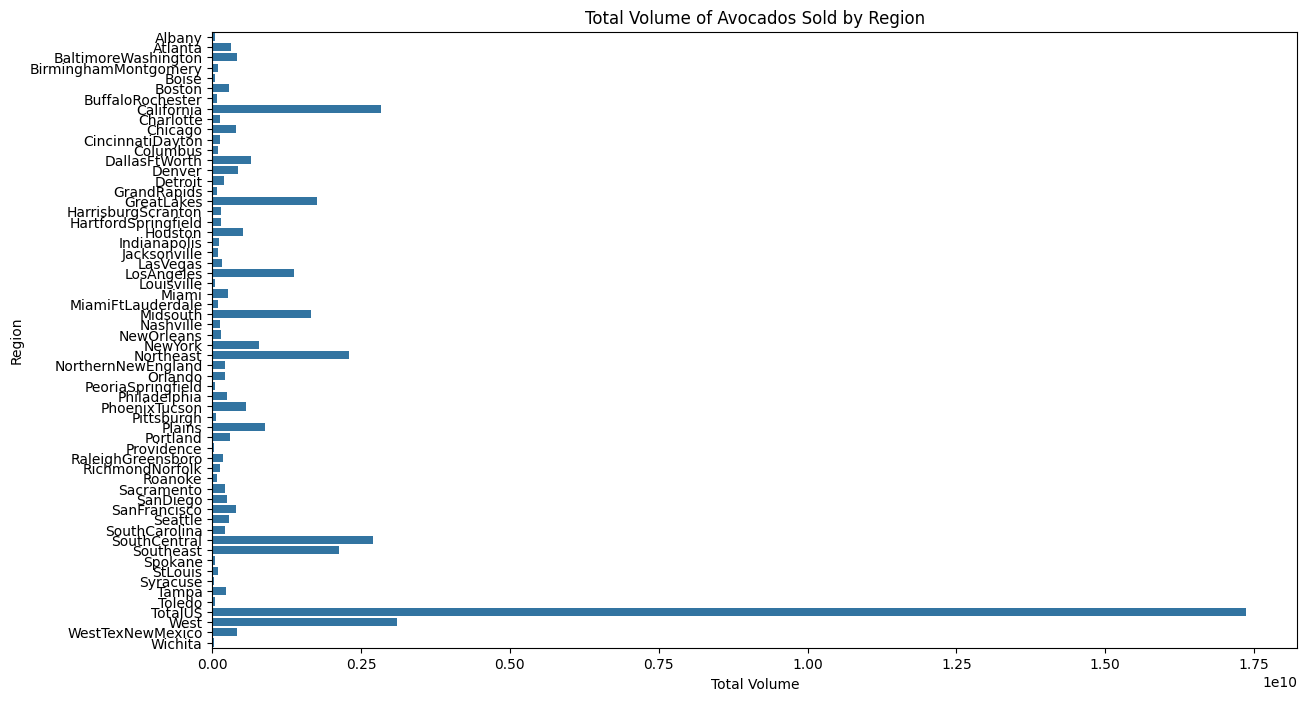

In [20]:
# Bar plot of total volume by region
plt.figure(figsize=(14, 8))
sns.barplot(x='TotalVolume', y='Region', data=regional_sales)
plt.title('Total Volume of Avocados Sold by Region')
plt.xlabel('Total Volume')
plt.ylabel('Region')
plt.show()


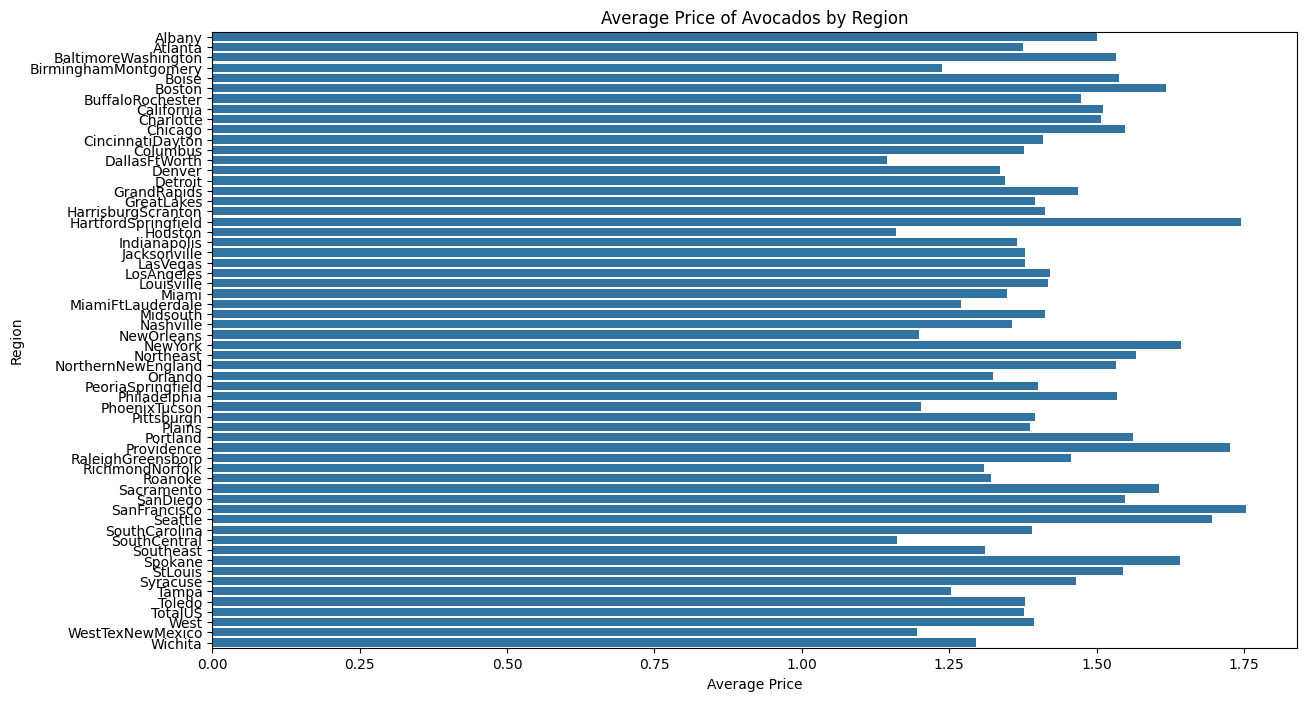

In [21]:
# Bar plot of average price by region
plt.figure(figsize=(14, 8))
sns.barplot(x='AveragePrice', y='Region', data=regional_sales)
plt.title('Average Price of Avocados by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

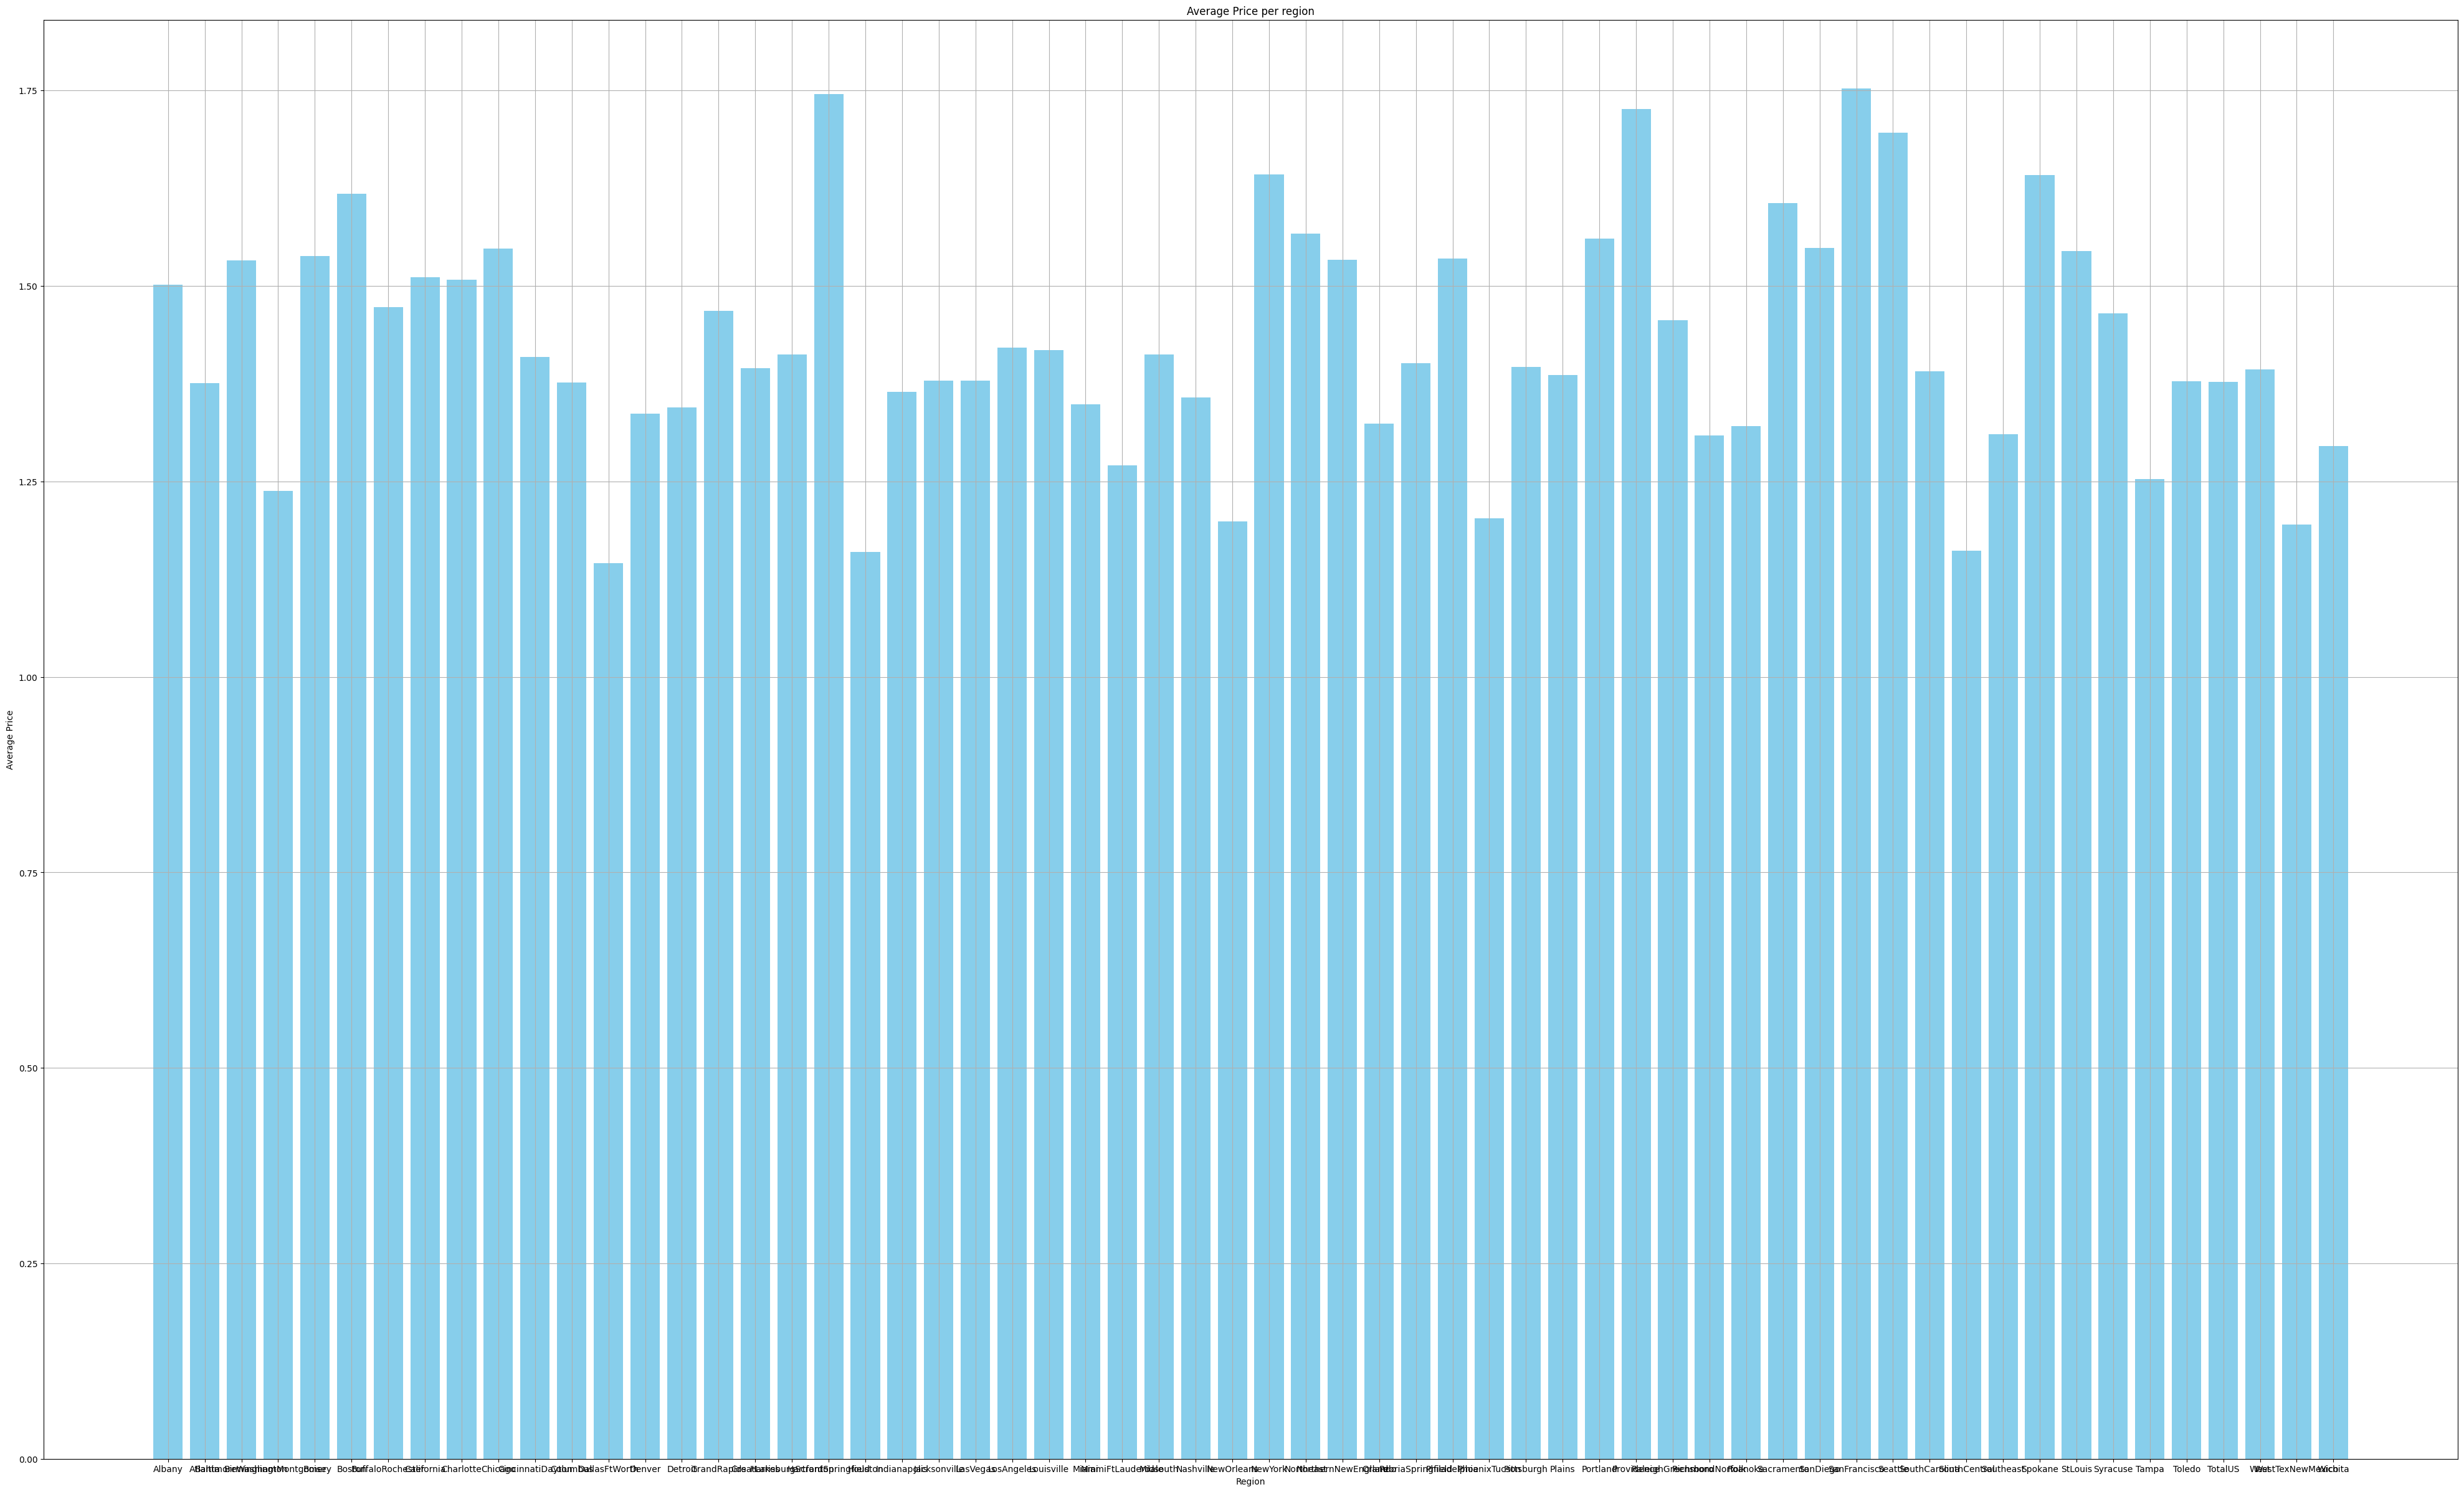

In [73]:
# Plot the average price per region
df_groupedregion = regional_sales.groupby('Region')['AveragePrice'].mean().reset_index()
plt.figure(figsize=(25, 10))
plt.bar(df_groupedregion['Region'], df_groupedregion['AveragePrice'], color='skyblue')
plt.title('Average Price per region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


---

### 5.1 US Totals EDA <a class="anchor" id="section_5_1"></a>

In the next section we will look exclusively at the US Totals data.  The region column in the dataset is a mix of cities, regions and the US Totals.  In order to analyse National statistics better we will isolate the TotalUS data in a new dataframe called US_total.  We will also drop the various size bags columns, other than TotalBags.  It was noticed that for many rows of data, TotalBags has a value and the different size bags have zero values.  We will concentrate on TotalVolume, Small_Avos, Large_Avos, XLarge_Avos and TotalBags.

In [22]:
# drop the different sizes of bags features as we are not going to use those features and filter the dataset to obtain all rows 
# that pertain to TotalUS
"""make a temporary copy of df_copy where TotalUS rows are isolated.
drop the SmallBags, LargeBags and XLargeBags features"""

US_total = df_cleaned[ df_cleaned['Region'] == 'TotalUS'  ]
US_total = US_total.drop(['SmallBags','LargeBags','XLargeBags','Area'],axis=1)
US_total.head()

,Date,AveragePrice,TotalVolume,SmallAvos,LargeAvos,XLargeAvos,TotalBags,Type,Region,Year,Month,Year_Month
102,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,conventional,TotalUS,2015,1,20151
103,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,organic,TotalUS,2015,1,20151
210,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,conventional,TotalUS,2015,1,20151
211,2015-01-11,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,organic,TotalUS,2015,1,20151
318,2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,conventional,TotalUS,2015,1,20151


**Analyse the shape of the dataframe**

In [23]:
US_total.shape

(932, 12)

In [25]:
obj_data = US_total.select_dtypes(include='object') #This part of the code selects all columns in the Avocado_Data DataFrame that have the data type ‘object’. Typically, ‘object’ data types in pandas are used for text or categorical data.
obj_data.describe() #This generates descriptive statistics for the selected object-type columns. For object data, the describe() method provides the following statistics:count: The number of non-null entries.unique: The number of unique values.top: The most frequent value.freq: The frequency of the most frequent value.


,Type,Region,Year_Month
count,932,932,932
unique,2,1,108
top,conventional,TotalUS,20153
freq,466,932,10


**Results**:  the dataset consists of 932 rows and 12 columns

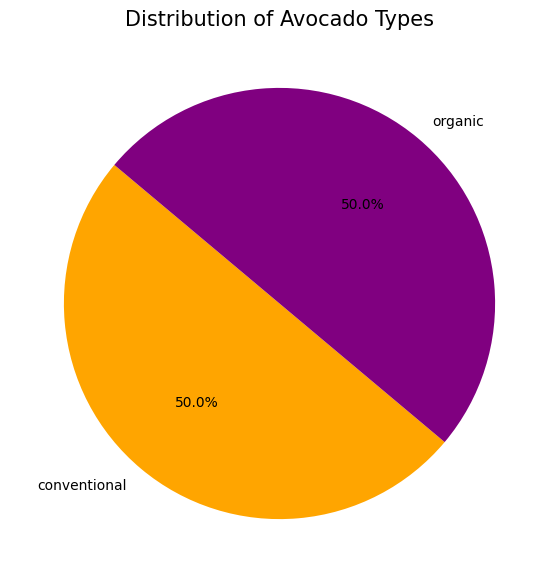

In [26]:
type_counts = US_total['Type'].value_counts()

# Create a pie chart with specified colors
colors = ['orange', 'purple']
plt.figure(figsize=(10, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors[:len(type_counts)])

# Add a title
plt.title('Distribution of Avocado Types', fontsize=15)

# Display the plot
plt.show()

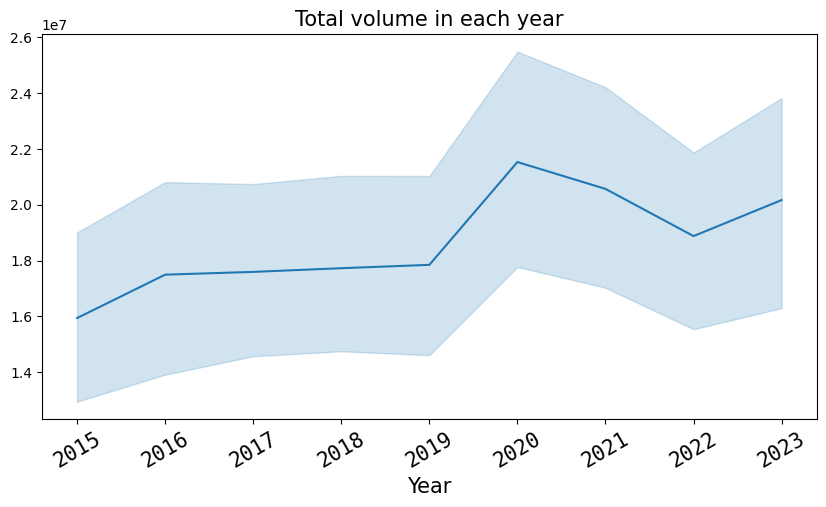

In [27]:
#Here, a line plot is created using Seaborn (sns). The x-axis represents the ‘Year’ column, and the y-axis represents the ‘Totalvolume’ column from the Avocado_Data DataFrame.
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=US_total['Year'],y=US_total['TotalVolume'])
ax.set_title('Total volume in each year',fontsize=15)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('')
plt.xticks(rotation=30,fontsize=15,fontname='monospace')
plt.show()


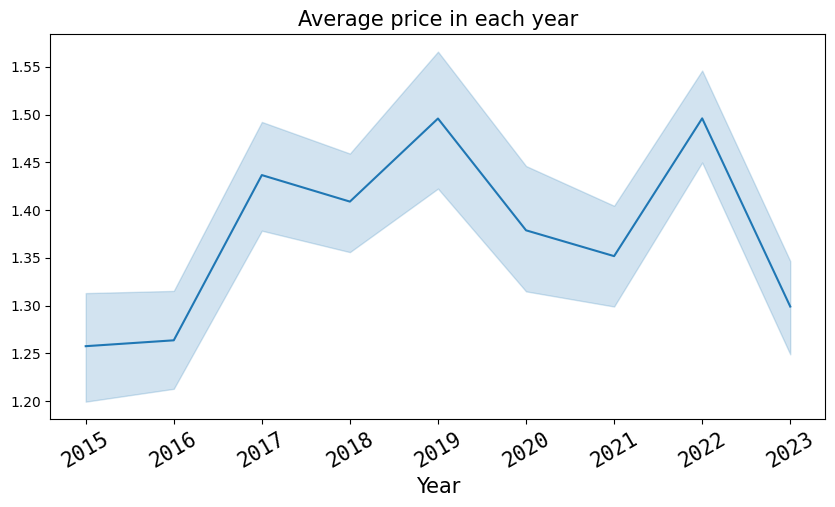

In [28]:
# Here, sns.lineplot is used to create a line plot. The x parameter is set to the ‘Year’ column of the Avocado_Data DataFrame, and the y parameter is set to the ‘Averageprice’ column. The result is assigned to the variable ax, which represents the axes of the plot.
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=US_total['Year'],y=US_total['AveragePrice'])
ax.set_title('Average price in each year',fontsize=15)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('')
plt.xticks(rotation=30,fontsize=15,fontname='monospace')
plt.show()


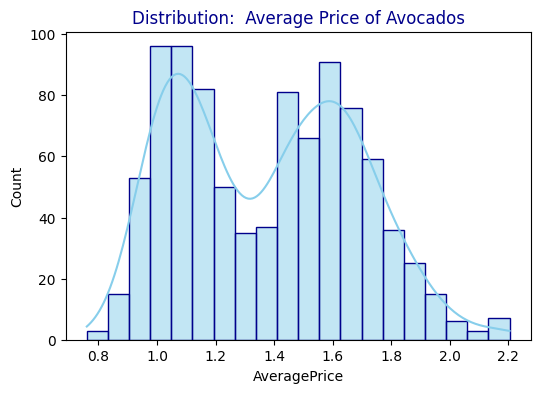

In [78]:
# Visualize the distribution of AveragePrice organic
All = US_total
plt.figure(figsize=(6, 4))
sns.histplot(All['AveragePrice'], bins=20, kde=True, color='skyblue',ec='darkblue')
plt.title('Distribution:  Average Price of Avocados',color='darkblue')
plt.show()

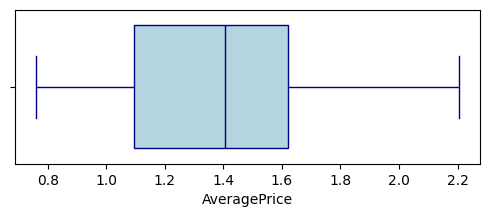

In [79]:
#box plot of the prices of organic avocados
All = US_total
plt.figure(figsize=(6, 2))
sns.boxplot(x='AveragePrice', data=All, color='lightblue',linecolor='darkblue')
plt.show()

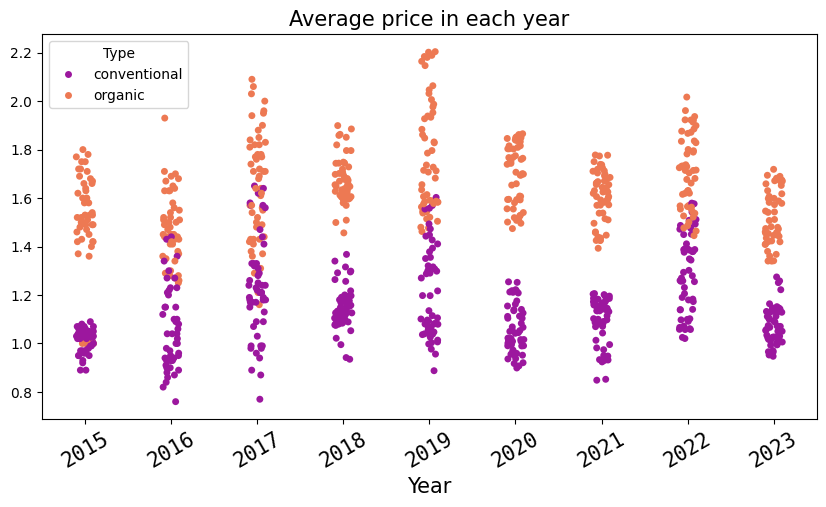

In [29]:
#Here, a line plot is created using Seaborn (sns). The x-axis represents the ‘Year’ column, and the y-axis represents the ‘Averageprice’ column from the Avocado_Data DataFrame.
plt.figure(figsize=(10,5))
ax = sns.stripplot(x=US_total['Year'],y=US_total['AveragePrice'],hue=US_total['Type'],palette='plasma')
ax.set_title('Average price in each year',fontsize=15)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('')
plt.xticks(rotation=30,fontsize=15,fontname='monospace')
plt.show()


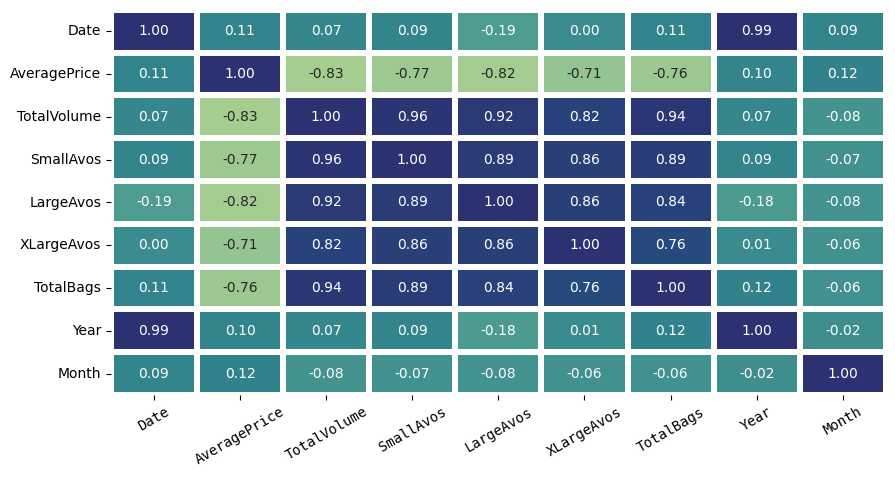

In [30]:
#This calculates the correlation matrix for the numeric columns in obj_data. The correlation matrix shows the pairwise correlation coefficients between variables
obj_data = US_total.select_dtypes(exclude='object')
corr = obj_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=3, cbar=False, cmap="crest")
plt.xticks(rotation=30,fontsize=10,fontname='monospace')
plt.show()


---

To facilitate analysis of conventional and organic avocados, split the above table into a conventional table and an organic table.

In [31]:
#create a table of only conventional avos and only organic avos.
US_total_conventional = US_total[ US_total['Type'] == 'conventional'  ]
US_total_organic = US_total[ US_total['Type'] == 'organic'  ]

**Describe the US_total dataset**

In [32]:
#Use the describe function to understand the USTotal dataset
US_total.describe().round().style.format(thousands=",",precision=0)

,Date,AveragePrice,TotalVolume,SmallAvos,LargeAvos,XLargeAvos,TotalBags,Year,Month
count,932,932,932,932,932,932,932,932,932
mean,2019-06-19 12:18:32.446351872,1,"18,624,674","6,502,219","4,723,171","434,611","4,633,142","2,019",6
min,2015-01-04 00:00:00,1,"501,815",0,0,0,"119,856","2,015",1
25%,2017-03-26 00:00:00,1,"1,441,910","132,146","248,065","2,568","761,571","2,017",4
50%,2019-06-19 12:00:00,1,"10,257,275","3,772,220","2,226,544","189,483","2,166,670","2,019",6
75%,2021-09-12 00:00:00,2,"35,577,064","12,248,959","8,634,787","741,322","8,967,964","2,021",9
max,2023-12-03 00:00:00,2,"61,034,457","25,447,202","20,470,573","2,860,025","16,298,296","2,023",12
std,nan,0,"17,705,676","6,679,803","4,845,212","530,233","4,236,979",3,3


**Results**:  Total Volume has a very wide spread of values from a minimum of 501 815 to a maximum of 61 034 457.  
The 50% percentile mark is much closer to the minimum, suggesting a right tailed distribution curve of volumes.  
The mean is higher than the 50% percentile mark as it is affected by high outliers.  We see similar trends for the varous sizes of avocados sold.  
The dataset consists of both conventional and organic avocado sales; and as can been seen from analysis dealt with in a further section, volumes of organic avocados sold is small compared to conventional avocados.  Therefore the low minimum values are likely related to the lower organic avocado sales volume, which we will see later in the analysis.
The data in the above table for Date, Year and Month is meaningless, as it relates to time.

---

**Correlation Between Features**

In [33]:
features=['AveragePrice','TotalVolume','SmallAvos','LargeAvos','XLargeAvos','TotalBags']
US_total[features].corr(numeric_only=True).round(2)

,AveragePrice,TotalVolume,SmallAvos,LargeAvos,XLargeAvos,TotalBags
AveragePrice,1.00,-0.83,-0.77,-0.82,-0.71,-0.76
TotalVolume,-0.83,1.00,0.96,0.92,0.82,0.94
SmallAvos,-0.77,0.96,1.00,0.89,0.86,0.89
LargeAvos,-0.82,0.92,0.89,1.00,0.86,0.84
XLargeAvos,-0.71,0.82,0.86,0.86,1.00,0.76
TotalBags,-0.76,0.94,0.89,0.84,0.76,1.00


**Results** :
As would be expected average price has a negative correlation with volume, especially for conventional avocados. As price increases, volume decreases as can be seen in the scatterplot below.  For organic avos however there does not seem to be any correlation between price and volume, suggesting that buyers are not price sensitive and that they are buying organic avos out of choice.


---
**Sactterplot of Average Prices and Volume Sold, Looking at Conventional and Organic Avocados Separately**

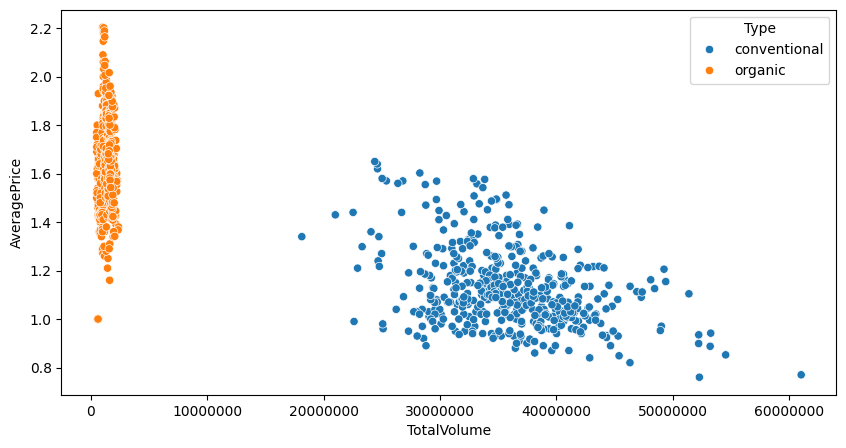

In [34]:
# plot the TotalVolume against AveragePrice, distinguishing between conventional and organic avocado sales
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalVolume',y='AveragePrice',hue='Type', data=US_total).ticklabel_format(style='plain', axis='x')
plt.show()

**Results:** There is a general negative correlation between average price per pound and total volume for conventional avocados.  
Because the volumes of organic avocados is low, lets look at the same scatterplot but with organic avocados in isolation

---
**Scatterplot of Only Organic Avocados**

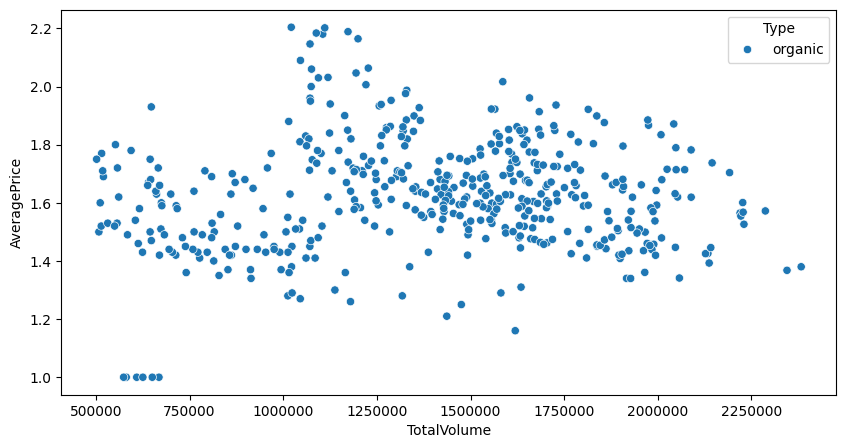

In [82]:
# plot the TotalVolume against AveragePrice for organic avocados only
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalVolume',y='AveragePrice',hue='Type', data=US_total_organic).ticklabel_format(style='plain', axis='x')
plt.show()

**Results:** The total volume of organic avocados sold does not seem to be affected by the average price.  This suggests that buyers will choose organic avocados out of principle no matter the price.

---

**Proportional Volume of Total Avos Sold by Size Over The Period**

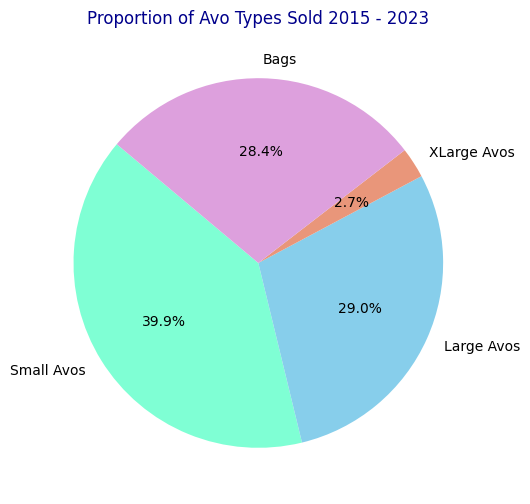

In [36]:
# Calculate the sum of each size type across all rows
total_small_avos = US_total['SmallAvos'].sum()
total_large_avos = US_total['LargeAvos'].sum()
total_xlarge_avos = US_total['XLargeAvos'].sum()
totalBags = US_total['TotalBags'].sum()

# Create data for the pie plot
sizes = [total_small_avos, total_large_avos, total_xlarge_avos,totalBags]
labels = ['Small Avos', 'Large Avos', 'XLarge Avos','Bags']
colors = ['aquamarine', 'skyblue', 'darksalmon','plum']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Avo Types Sold 2015 - 2023',color='darkblue')
plt.show()

**Results:** Over the period 2015 to 2023 it appears that mostly loose avocados were sold,(71% of all weight), with bags accounting for 28% of sales. People are probably buying individual avos, so that they do not go rotten.  If they buy bags, they run the risk of avos going bad and throwing them away.  Mainly small avocados are sold, followed by large avocados - this is possibly because most avocados that are grown fall within these categories.



---

**Proportion of Conventional and Organic Avocados Sold**

To get an idea of how many pounds of organic avocados are sold versus conventional, summarise the total sales over the period by total volume and size.

In [37]:
filter_for_group = US_total[['TotalVolume','SmallAvos','LargeAvos','XLargeAvos','TotalBags','Type']]
grouped_type_mean = filter_for_group.groupby('Type').sum().round().style.format(thousands = ",",precision=0)
print('The total volume sold by Avo type:')
grouped_type_mean

The total volume sold by Avo type:


,TotalVolume,SmallAvos,LargeAvos,XLargeAvos,TotalBags
Type,,,,,
conventional,"16,709,509,905","5,978,549,130","4,290,424,949","403,375,429","3,964,915,805"
organic,"648,686,723","81,518,848","111,570,306","1,682,087","353,172,129"


The proportion of organic avos sold compared to conventional is very low at 3.7% as can be seen in the pie chart below

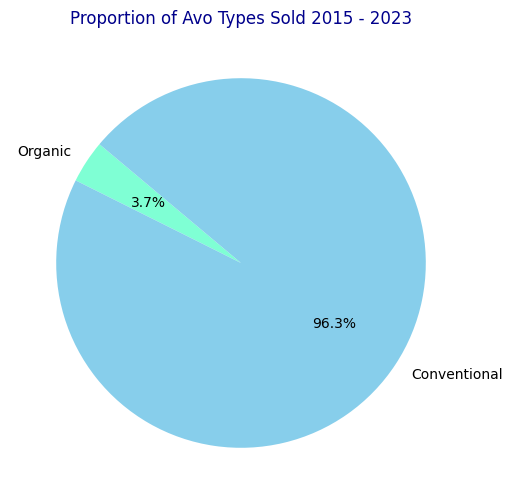

In [38]:
# Calculate the sum of each bag type across all rows
total_organic = US_total_organic['TotalVolume'].sum()
total_conventional = US_total_conventional['TotalVolume'].sum()


# Create data for the pie plot
sizes = [total_organic, total_conventional, ]
labels = ['Organic', 'Conventional']
colors = ['aquamarine', 'skyblue']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Avo Types Sold 2015 - 2023',color='darkblue')
plt.show()

---

**Total Volume Sold Over Time**

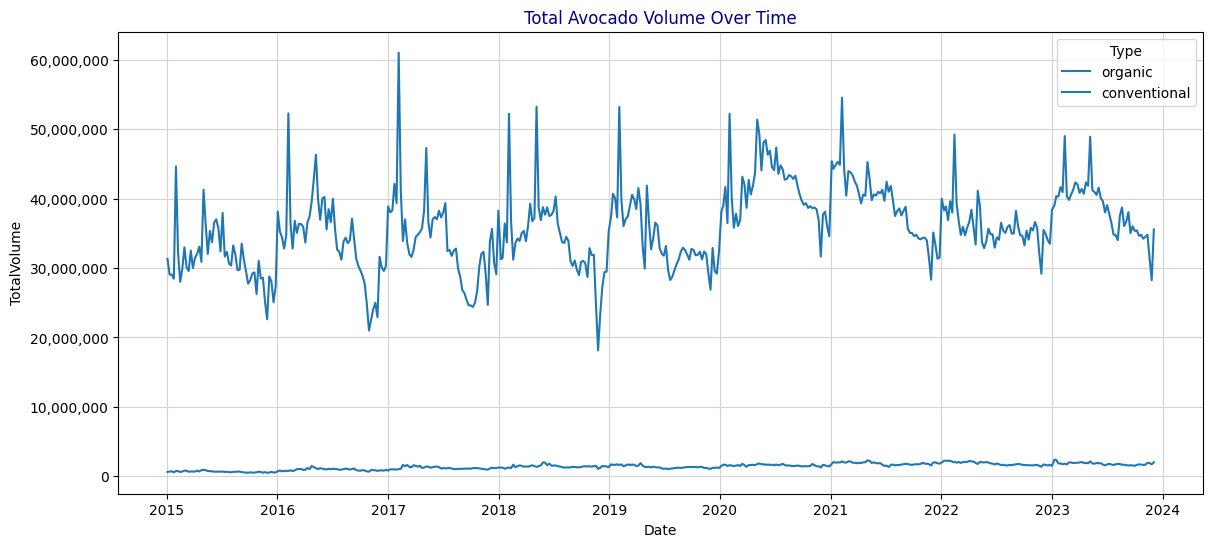

In [85]:
# Plot total volume over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='TotalVolume', hue='Type', data=US_total_organic, color='green')
sns.lineplot(x='Date', y='TotalVolume',hue='Type', data=US_total_conventional, color='blue')
plt.title('Total Avocado Volume Over Time',color='darkblue')

# Customise the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Show the grid
plt.grid(color='lightgrey')

#plt.legend(type)
plt.show()


**Results:** There appears to be a cyclical nature in the sales of conventional avocados with a spike early in the year, and a dip towards the end of the year.  Sales volumes of conventional avocados has on average increased slightly as from 2021 onwards.  It is difficult to see what is happening with the trend of organic avocados, so let's graph organic avocado volumes sales on its own.

*Line graph showing the total volume of organic avocados sold over time*

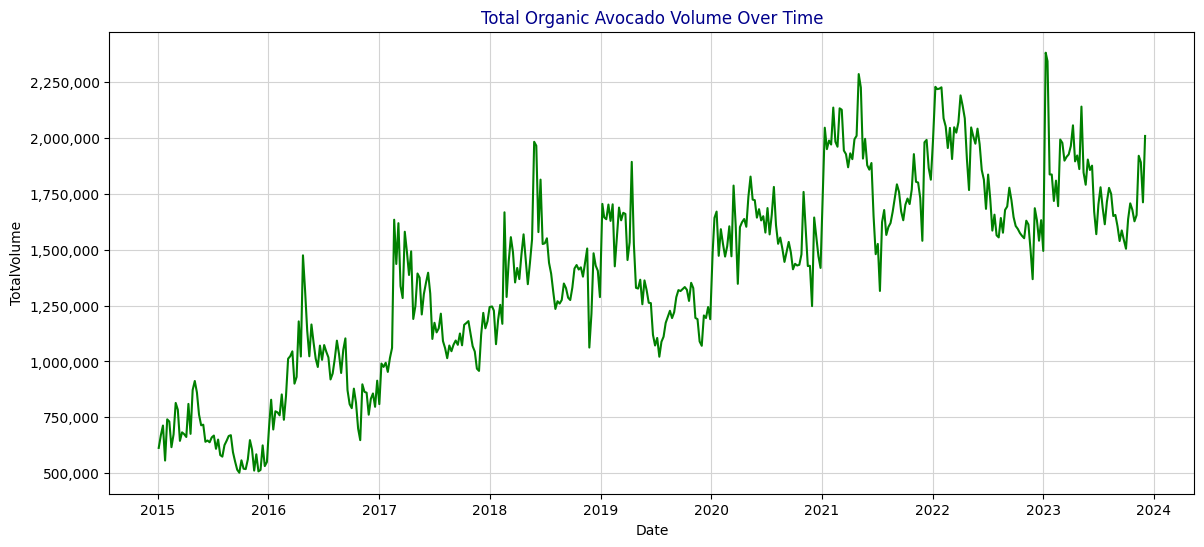

In [40]:
# Plot total volume of organic avocados over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='TotalVolume', data=US_total_organic, color='green')
plt.title('Total Organic Avocado Volume Over Time',color='darkblue')

# Customise the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Show the grid
plt.grid(color='lightgrey')

plt.show()

**Results:** Organic avocado sales volume has been steadily increasing from 2015 to 2021, stabilising in the period 2021 to 2023.

---

**Total Sales Volume by Year**

*Bar graph showing total sales volumes per year for both avocado types*

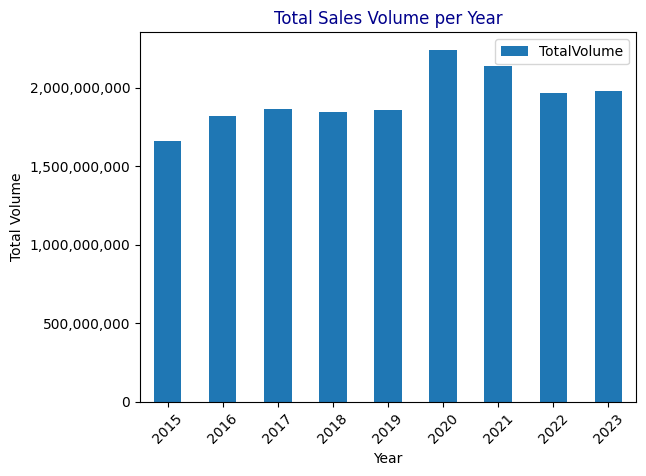

In [41]:
total_year_vol = US_total.loc[:,['TotalVolume','Year']]
total_year_grouped = total_year_vol.groupby('Year').sum()
graph = total_year_grouped.plot(kind='bar')

# Customize the plot
plt.title('Total Sales Volume per Year',color='darkblue')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
plt.show()


**Results**:  Total sales peaked in 2020, followed by 2021.  Factors that led to this can be ascribed to the following:

**1. Changes driven by the Covid pandemic**:  more people started cooking at home more often, increasing the demand for fresh produce. 

**2. Holiday sales**:  avocado sales saw increases during holiday times. 

**3. E-commerce growth**:  The pandemic encouraged people to use online shoppping, and it was convenient to add avocados to their order.  

**4. Price adjustments**:  there were reductions in the price of avocados in 2020, making avocados more affordable. 


---

**Total Sales Volume by Month**

*Bar graph showing total sales volumes by month for both avocado types*

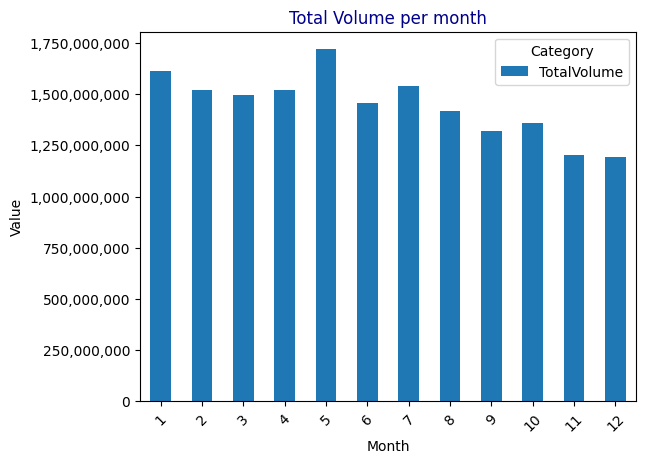

In [42]:
MonthVoltotal = US_total.loc[:,['TotalVolume','Month']]
MonthVolGrouped = MonthVoltotal.groupby('Month').sum()
MonthVolGrouped

graph = MonthVolGrouped.plot(kind='bar')

# Customize the plot
plt.title('Total Volume per month',color='darkblue')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
plt.legend(title='Category')
plt.show()

**Results**:  avocado sales peak in May, and reach their lowest in December followed by a sudden increase in January

**1.  Peak in May**:  This is mainly due to the increase in supply from Mexico, which is the largest supplier of avocados to the USA.  Summer season also gets going at this time.

**2. December trough**:  Consumers focus on traditional foods and dishes, which results in a temporary drop in sales



---

**Analysis of Avocado Prices**

*Mean avocado price by type*

In [43]:
# calculate the mean price of the types of avocados
prices = US_total.loc[:,['AveragePrice','Type']]
Means= prices.groupby('Type').mean().round(2)
Means

,AveragePrice
Type,
conventional,1.13
organic,1.63


**Results:** Organic avocados are on average $0.50, (44%) more per pound than conventional avocados.  This can be expected as organic goods are generally more expensive.

*Median avocado price by type*

In [44]:
# calculate the median price of the types of avocados
# prices = US_total.loc[:,['AveragePrice','Type']]
Medians = prices.groupby('Type').median().round(2)
Medians

,AveragePrice
Type,
conventional,1.10
organic,1.62


*Distribution of average price of conventional avocados*

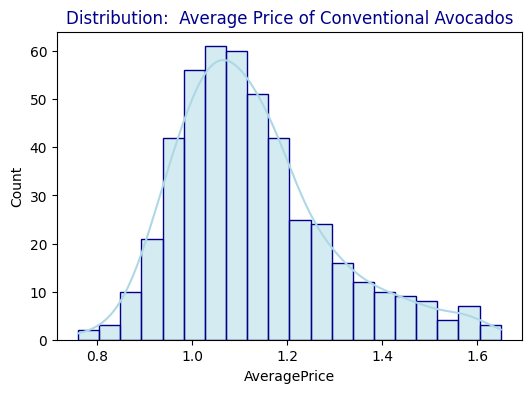

In [45]:
# Visualize the distribution of AveragePrice conventional
conventional = US_total[US_total['Type'] == 'conventional']
plt.figure(figsize=(6, 4))
sns.histplot(conventional['AveragePrice'], bins=20, kde=True, color='lightblue', ec='darkblue')
plt.title('Distribution:  Average Price of Conventional Avocados',color='darkblue')
plt.show()

**Results:** The average price of conventional avos is $1.13, whereas  the median price is around $1.10.  As can be seen in the next graph there are many outliers at the top end of the price range driving the average price up

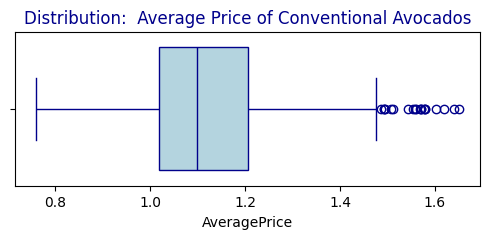

In [46]:
#box and whisker plot of the price of conventional avocados
plt.figure(figsize=(6, 2))
sns.boxplot(x='AveragePrice', data=conventional, color='lightblue',linecolor='darkblue')
plt.title('Distribution:  Average Price of Conventional Avocados',color='darkblue')
plt.show()

**Results:** The median price of avocados, the 50% range of prices is in a very narrow band from about $1.10 to $1.20 per pound.  The distribution of prices pretty much follows a normal distribution with a number of outliers towards the upper price range.

*Distribution of average price of organic avocados*

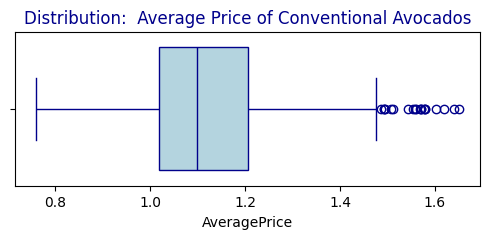

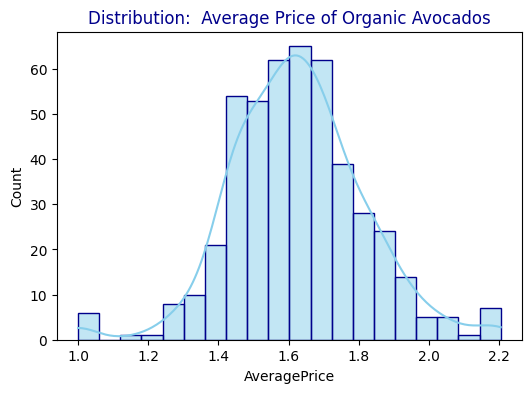

In [40]:
# Visualize the distribution of AveragePrice organic
organic = US_total[US_total['Type'] == 'organic']
plt.figure(figsize=(6, 4))
sns.histplot(organic['AveragePrice'], bins=20, kde=True, color='skyblue',ec='darkblue')
plt.title('Distribution:  Average Price of Organic Avocados',color='darkblue')
plt.show()

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

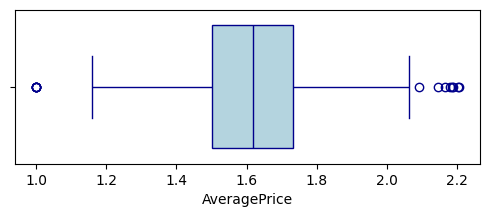

In [50]:
#box plot of the prices of organic avocados
organic = US_total[US_total['Type'] == 'organic']
plt.figure(figsize=(6, 2))
sns.boxplot(x='AveragePrice', data=organic, color='lightblue',linecolor='darkblue')
plt.show()

**Results:** The prices of organic avocados are more evenly distributed around the mean of $1.63.

*Line graph showing the average price of both conventional and organic avocados for the period 2015-2023*

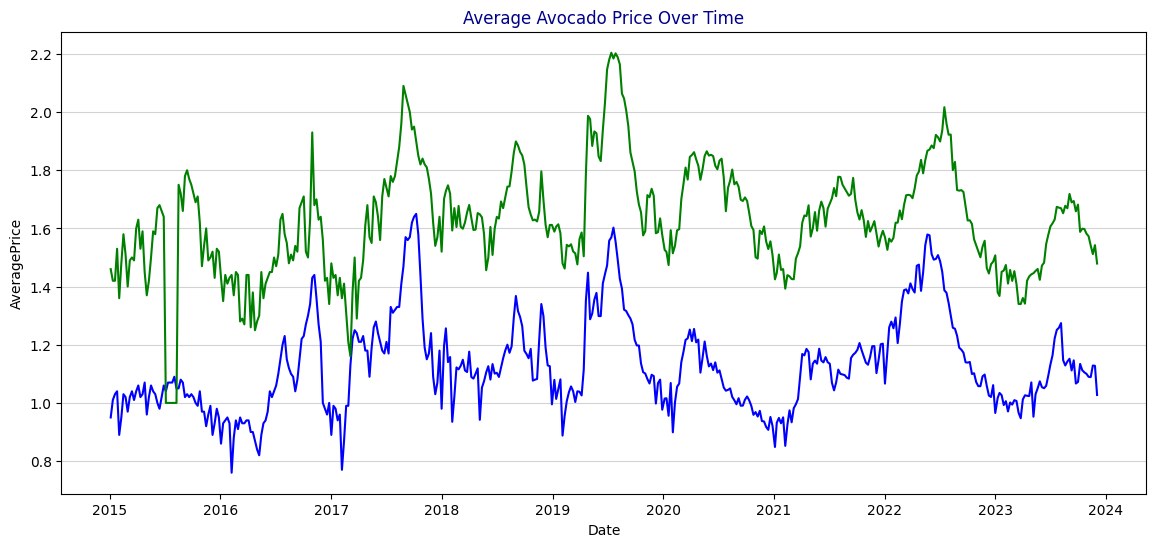

In [51]:
# Plot average price over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='AveragePrice', data=conventional, color='blue')
sns.lineplot(x='Date', y='AveragePrice', data=organic, color='green')
plt.title('Average Avocado Price Over Time',color='darkblue')
plt.grid(axis='y',color='lightgrey')
plt.show()

**Results:** On average organic avo prices are 44% higher than conventional avo prices and appear to move in sync with each other.
2017, 2019 and 2022 saw high avo prices, with prices peaking in 2019.  In this year California's avo production was very low compared to other years.  Mexico's production was low and there were threats of tariffs and border closures. Mexico provides USA with 90% of their avos. 

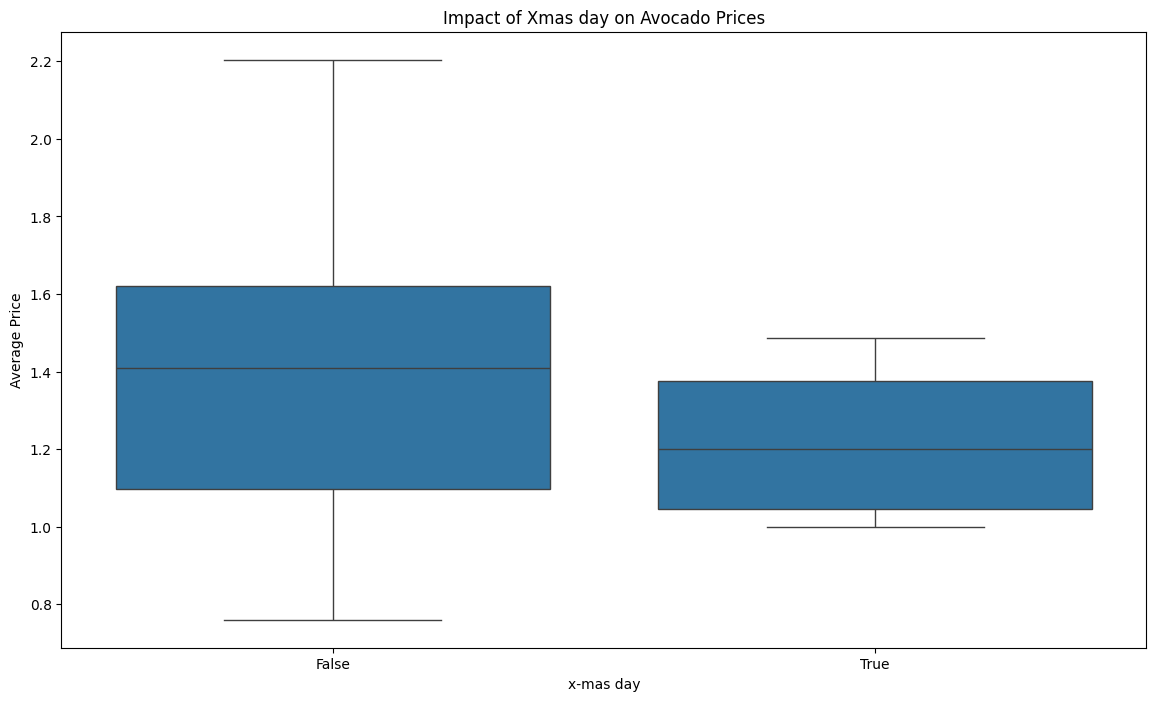

In [52]:

# Impact of holidays on avocado prices
# Assuming 'Date' column is already in datetime format
holidays = ['2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25', '2020-12-25', '2021-12-25', '2022-12-25', '2023-12-25']
US_total['Holiday'] = US_total['Date'].isin(pd.to_datetime(holidays))

plt.figure(figsize=(14, 8))
sns.boxplot(x='Holiday', y='AveragePrice', data=US_total)
plt.title('Impact of Xmas day on Avocado Prices')
plt.xlabel('x-mas day')
plt.ylabel('Average Price')
plt.show()


#### <a href=#cont>Back to Table of Contents</a>

---

## 6. Conclusion <a class="anchor" id="chapter7"></a>

> <b> Sales Trends:</b> Cyclic Patterns: Avocado sales exhibit seasonal fluctuations, with peaks in certain months and troughs in others | Price Sensitivity: Conventional avocado sales are influenced by price, with higher prices leading to lower volumes. However, organic avocado sales appear to be less price-sensitive, suggesting that consumers are willing to pay a premium for organic products | Seasonal Variations: Both sales volumes and prices exhibit seasonal patterns, with specific months experiencing higher or lower demand and prices.

> <b> Market Dynamics:</b> Organic Premium: Organic avocados consistently command higher prices than conventional avocados, reflecting a premium associated with organic products | Size Preferences: Small and large avocados are the most popular sizes, while medium avocados have lower sales volumes | Packaging Preferences: Loose avocados are the dominant packaging format, outselling pre-packaged bags.

> <b> External Factors:</b> Supply Chain Disruptions: Events such as the COVID-19 pandemic and supply chain disruptions can significantly impact avocado sales and prices.

> <b> Recommendations:</b> Demand Forecasting: Utilize the identified seasonal patterns and price sensitivity to accurately forecast avocado demand and optimize inventory management | Price Optimization: Consider dynamic pricing strategies to maximize revenue while maintaining market share, particularly for conventional avocados | Organic Expansion: Explore opportunities to expand organic avocado offerings to capitalize on the growing consumer preference for organic products | Supply Chain Resilience: Develop strategies to mitigate the impact of supply chain disruptions and ensure a consistent supply of avocados.

> <b>Concluding Thoughts:</b> Overall, this analysis offers a comprehensive understanding of avocado sales trends and provides valuable insights for businesses operating in the avocado market. By leveraging these findings, stakeholders can make informed decisions to optimize their operations, improve profitability, and stay ahead of market trends.

#### <a href=#cont>Back to Table of Contents</a>

---

## 8. References <a class="anchor" id="chapter11"></a>

Maintaining clear and organized documentation is crucial for reproducibility and credibility. Harvard referencing, a widely recognized citation style, can be effectively applied to data science notebooks to ensure proper acknowledgment of sources and facilitate the tracing of data and methodologies back to their origins.

1. Citing Data Sources: When gathering datasets for analysis, it's essential to cite the origin of the data. This includes providing details such as the author, publication date, title, and source of the dataset. In your notebook, you can include inline citations for each dataset you use, following the Harvard referencing format. 

<div class="alert alert-block alert-warning">
<b>Example:</b> The World Bank. (2020). World Development Indicators. Retrieved from https://datacatalog.worldbank.org/dataset/world-development-indicators
</div>

2. Referencing Research Papers: Data science often involves building upon existing research. Whether you're utilizing algorithms, methodologies, or theories from academic papers, it's important to reference them properly. Include citations for relevant papers within your notebook, both in the narrative sections and within code comments where applicable.

<div class="alert alert-block alert-warning">
<b>Example:</b> Smith, J., & Doe, A. (2018). Predictive Modeling Techniques for Financial Forecasting. Journal of Data Science, 10(2), 123-135.
</div>

3. Code Libraries and Packages: Data science projects heavily rely on various libraries and packages for analysis and visualization. When utilizing third-party code, make sure to acknowledge the creators by referencing the relevant documentation or papers associated with those tools.

<div class="alert alert-block alert-warning">
<b>Example:</b> Matplotlib Development Team. (2020). Matplotlib: A 2D plotting library. Retrieved from https://matplotlib.org/
</div>

4. Acknowledging Scholarly Contributions: If you've consulted online forums, blogs, or other informal resources during your project, it's courteous to acknowledge these contributions. While Harvard referencing is traditionally used for academic sources, you can adapt it to reference online resources as well.

<div class="alert alert-block alert-warning">
<b>Example:</b> Kaggle. (2021). Titanic: Machine Learning from Disaster. Retrieved from https://www.kaggle.com/c/titanic
</div>


#### <a href=#cont>Back to Table of Contents</a>

---

<div class="alert alert-block alert-success">
<b>Another thing to consider:</b> Take a look at the notebooks uploaded on Athena to explore different methods for incorporating specific elements into your own notebooks.
</div>